# Capstone Project: Predicting NHL Player Salary

## Part II - Exploratory Data Analysis (EDA)

Author: Charles Ramey

Date: 05/15/2023

---

In this notebook, we'll start to look at some of the information that's hidden between the lines. We can start to get a sense of what the data *looks* like, and how we might expect certain stats and features to affect the value of player contracts.

#### Notebook Links

Part I - Project Intro & Data Cleaning
- [`Part-1_setup-and-cleaning.ipynb`](../code/Part-1_setup-and-cleaning.ipynb)

Part III - Modeling
- [`Part-3.1_modeling-forwards.ipynb`](../code/Part-3.1_modeling-forwards.ipynb)
- [`Part-3.2_modeling-defense.ipynb`](../code/Part-3.2_modeling-defense.ipynb)
- [`Part-3.3_modeling-goalies.ipynb`](../code/Part-3.3_modeling-goalies.ipynb)

Part IV - Conclusion, Recommendations, and Sources
- [`Part-4_conclusion-and-recommendations.ipynb`](../code/Part-4_conclusion-and-recommendations.ipynb)

### Contents

- [Data Import](#Data-Import)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))

### Library Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Data Import

In [2]:
signings = pd.read_csv('../data/signings_cleaned.csv')

In [3]:
skaters = pd.read_csv('../data/skaters_cleaned.csv')

In [4]:
forwards = pd.read_csv('../data/forwards_cleaned.csv')

In [5]:
defense = pd.read_csv('../data/defense_cleaned.csv')

In [6]:
goalies = pd.read_csv('../data/goalies_cleaned.csv')

## Exploratory Data Analysis (EDA)


One of the first things we would like to understand is what the actual distribution of contracts looks like. In the NHL, there are only a handful of star players who command large salaries. What we should expect to see here is a skewed distribution, with the majority of contracts signed falling at or near the minimum salary. This should be the case regardless of the position a player plays.

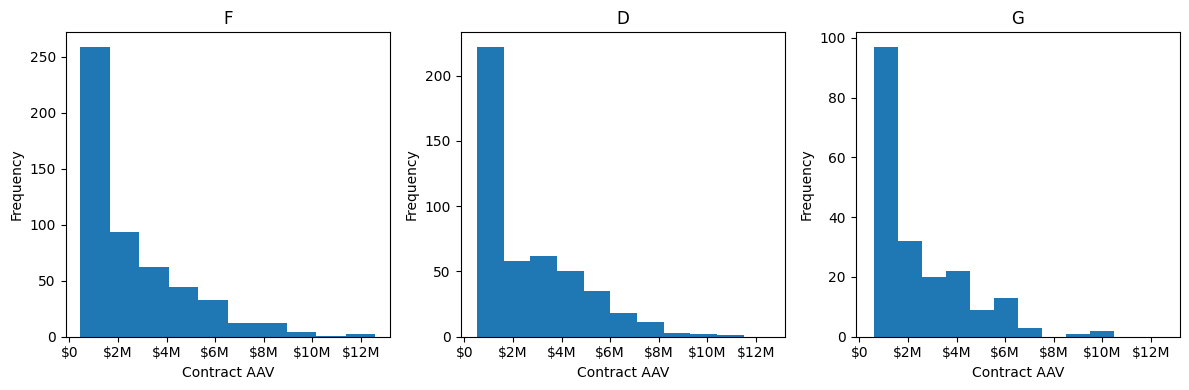

In [7]:
# List of position dataframes
position_dfs = [forwards, defense, goalies]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

# Iterate over each position dataframe and create a histogram subplot
for i, position_df in enumerate(position_dfs):
    # Select the corresponding subplot
    ax = axes[i]

    # Plot histogram of contract_aav for the position
    ax.hist(position_df['contract_aav'], bins=10)  # Adjust the number of bins as needed

    # Set subplot title and labels
    ax.set_title(position_df['pos'].iloc[0])
    ax.set_xlabel('Contract AAV')
    ax.set_ylabel('Frequency')
    ax.set_xticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000])
    ax.set_xticklabels(['$0', '$2M', '$4M', '$6M', '$8M', '$10M', '$12M'])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

Sure enough, that is exactly what we see. Whether a player is a forward, defenseman, or goalie, only the most talented players are signed to big contracts. One issue this skew may cause, is that the models are likely to lose accuracy as they try to predict higher value contracts since there are fewer examples for the model to train on. A possible solution is to logarithmically transform the data to achieve a more approximately normal distribution. We'll try that below.

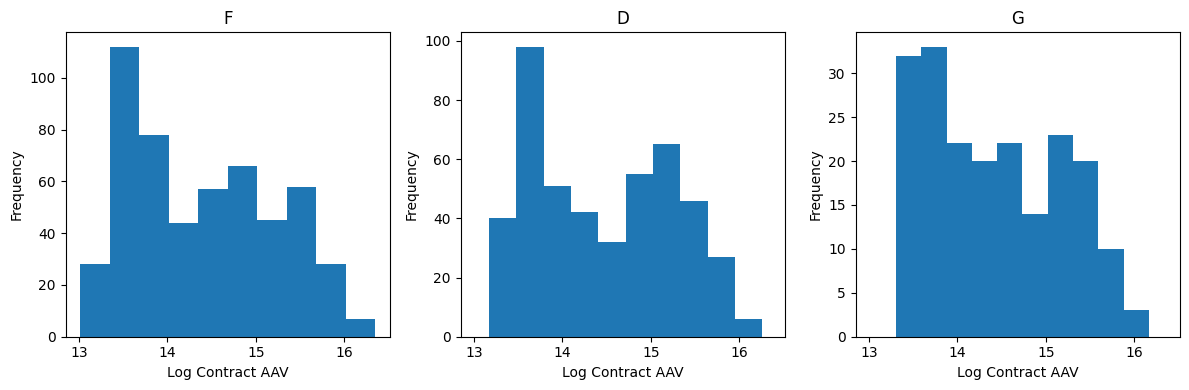

In [8]:
# List of position dataframes
position_dfs = [forwards, defense, goalies]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

# Iterate over each position dataframe and create a histogram subplot
for i, position_df in enumerate(position_dfs):
    # Select the corresponding subplot
    ax = axes[i]

    # Apply logarithmic transformation to the data
    position_df['log_contract_aav'] = np.log(position_df['contract_aav'])

    # Plot histogram of the transformed data
    ax.hist(position_df['log_contract_aav'], bins=10)  # Adjust the number of bins as needed

    # Set subplot title and labels
    ax.set_title(position_df['pos'].iloc[0])
    ax.set_xlabel('Log Contract AAV')
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Now our data is significantly less skewed. Interesting, there appears to be some slight bimodality to the distribution after transforming the data. Due to time constraints, the first version of this project will not investigate this bimodality further, though it will be a key factor to consider in future iterations.

One relationship we wanted to investigate from the beginning is the impact of the team's performance on the value of the contracts players sign the following year. Let's take a look at what the average contract value is for skaters by final standing.

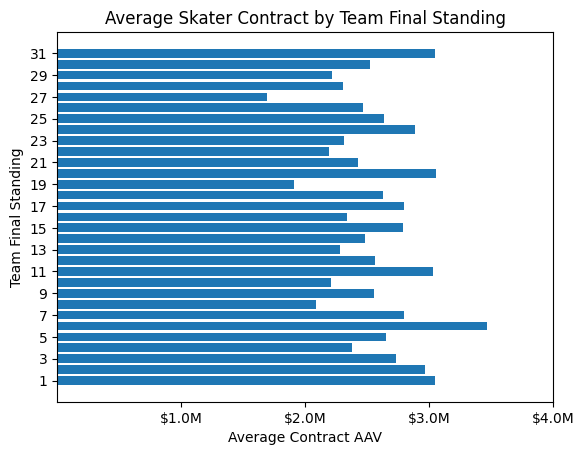

In [9]:
# Group the data by team_final standing and calculate the average contract_aav
grouped_df = skaters.groupby('final_standing')['contract_aav'].mean().reset_index()

# Sort the dataframe by final_standing in descending order
grouped_df.sort_values('final_standing', ascending=False, inplace=True)

# Create the horizontal bar plot
plt.barh(grouped_df['final_standing'], grouped_df['contract_aav'])

# Set the plot title and labels
plt.title('Average Skater Contract by Team Final Standing')
plt.xlabel('Average Contract AAV')
plt.ylabel('Team Final Standing')
plt.xticks([1000000, 2000000, 3000000, 4000000], 
           ['$1.0M', '$2.0M', '$3.0M', '$4.0M'])
plt.yticks(range(1, 32, 2))

# Display the plot
plt.show();

Interestingly, a team's final standing does not appear to have much impact on the contracts skaters sign the following year. Perhaps this is because there are many players on a team's roster, and a player may perform just as well on a bad team as a good team. It could also simply mean that team executives take a player's team into account before offering them a contract, but rather than poor team play *hurting* the player's contract, the team expects the player to improve when put in a new environment. It is not entirely clear why this is the case, but it does raise the question of whether the same is true for goalies, of which there are few on a team, and their performance can be highly correlated to a team's success. Let's look at average goalie salaries by final team standing.

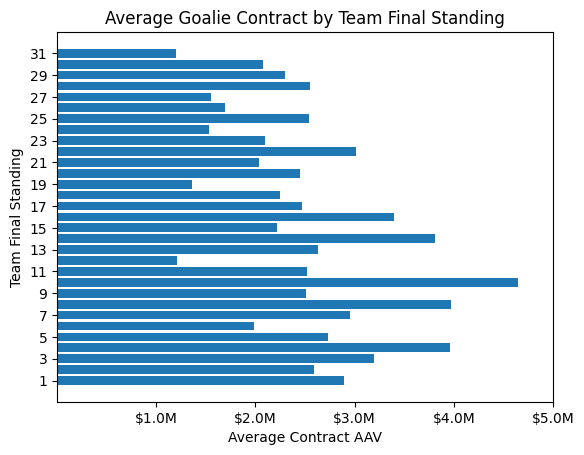

In [10]:
# Group the data by team_final standing and calculate the average contract_aav
grouped_df = goalies.groupby('final_standing')['contract_aav'].mean().reset_index()

# Sort the dataframe by final_standing in descending order
grouped_df.sort_values('final_standing', ascending=False, inplace=True)

# Create the horizontal bar plot
plt.barh(grouped_df['final_standing'], grouped_df['contract_aav'])

# Set the plot title and labels
plt.title('Average Goalie Contract by Team Final Standing')
plt.xlabel('Average Contract AAV')
plt.ylabel('Team Final Standing')
plt.xticks([1000000, 2000000, 3000000, 4000000, 5000000], 
           ['$1.0M', '$2.0M', '$3.0M', '$4.0M', '$5.0M'])
plt.yticks(range(1, 32, 2))

# Display the plot
plt.show();

Here we can see a bit more of a correlation between the final standing of team and the value of the contracts their goalies sign the following year. While the relationship isn't perfect, we do see that goalies tend to sign higher value contracts on average after their team has finished better than if their team performed poorly.

Another relationship we might look at is player points compared to contract value. Since points consist of both goals and assists, they are generally associated with the offensive output of a player. As such, we might expect to see a higher correlation between points and contract value for forwards than for defense.

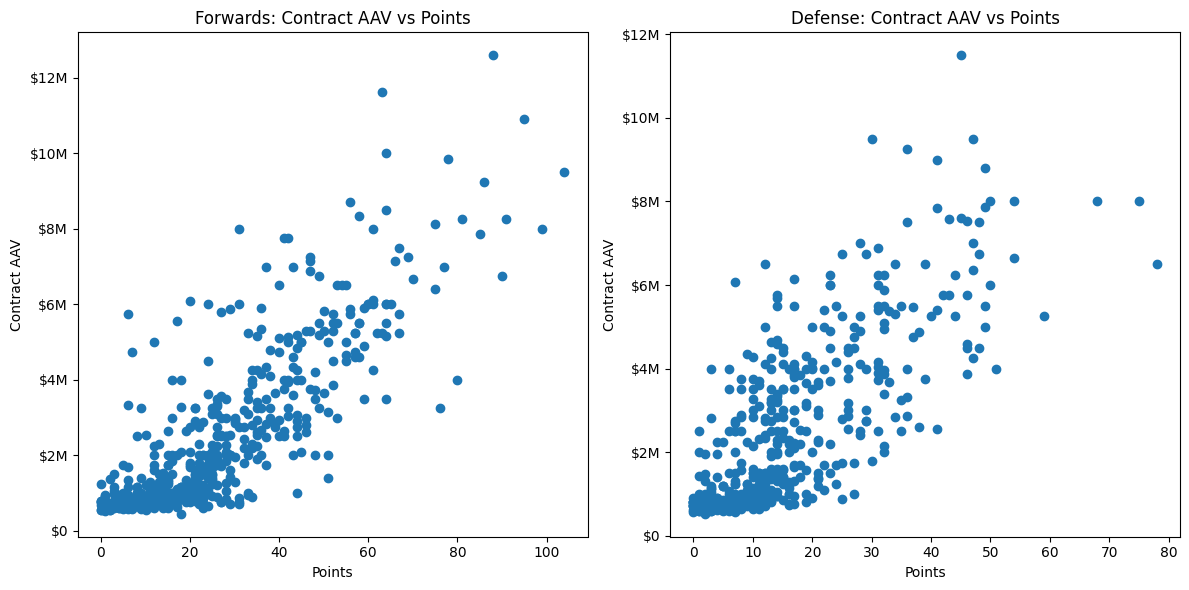

In [11]:
# Creating a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for forwards
ax1.scatter(forwards['points'], forwards['contract_aav'])
ax1.set_title('Forwards: Contract AAV vs Points')
ax1.set_xlabel('Points')
ax1.set_ylabel('Contract AAV')
ax1.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000])
ax1.set_yticklabels(['$0', '$2M', '$4M', '$6M', '$8M', '$10M', '$12M'])

# Scatter plot for defense
ax2.scatter(defense['points'], defense['contract_aav'])
ax2.set_title('Defense: Contract AAV vs Points')
ax2.set_xlabel('Points')
ax2.set_ylabel('Contract AAV')
ax2.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000])
ax2.set_yticklabels(['$0', '$2M', '$4M', '$6M', '$8M', '$10M', '$12M'])


# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show();

As we can tell from the plots above, there isn't much difference between forwards and defense. There is a relatively high correlation between points and contract value for both positions, demonstrated by the density of the plot points combined with the general positive linearity. While we expected to see a higher correlation for forwards, this result is not surprising, since defensemen who can generate points are very valuable in the NHL.

How about cap limits? This is something that we anticipated being highly correlated to player contract value. More money to spend should mean players are paid more. Let's take a look and see what this relationship actually looks like.

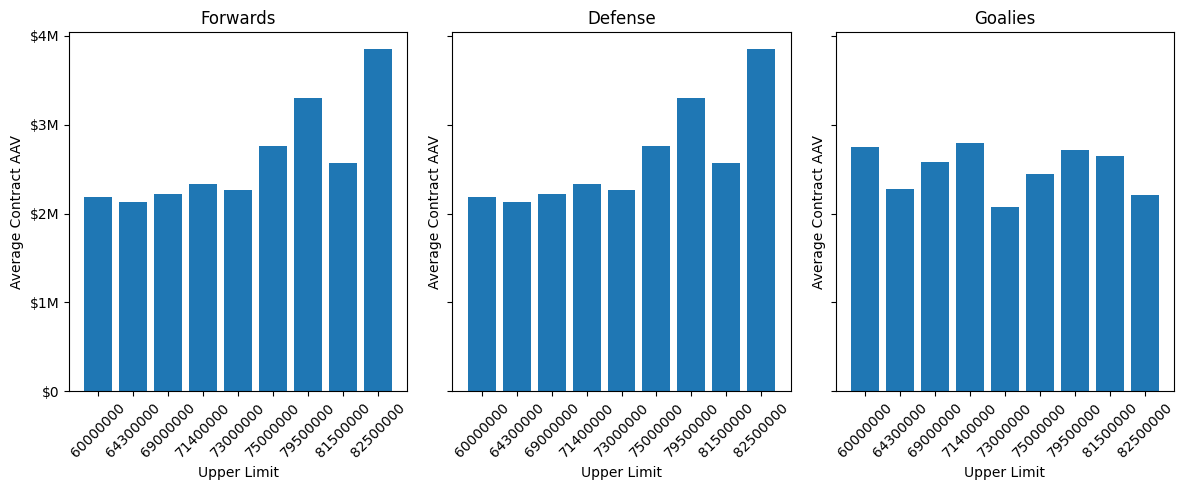

In [12]:
forwards_df = forwards.copy()
defense_df = defense.copy()
goalies_df = goalies.copy()

# Convert upper_limit values to integers
forwards_df['upper_limit'] = forwards_df['upper_limit'].astype(str)
defense_df['upper_limit'] = defense_df['upper_limit'].astype(str)
goalies_df['upper_limit'] = goalies_df['upper_limit'].astype(str)


# Calculate average contract_aav for each unique upper_limit
forwards_avg_aav = forwards_df.groupby('upper_limit')['contract_aav'].mean()
defense_avg_aav = forwards_df.groupby('upper_limit')['contract_aav'].mean()
goalies_avg_aav = goalies_df.groupby('upper_limit')['contract_aav'].mean()

# Create subplot bar plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

# Plot for forwards
ax1.bar(forwards_avg_aav.index, forwards_avg_aav.values)
ax1.set_title('Forwards')
ax1.set_xlabel('Upper Limit')
ax1.set_ylabel('Average Contract AAV')
ax1.set_xticks(range(len(forwards_avg_aav.index)))
ax1.set_xticklabels(forwards_avg_aav.index, rotation=45)
ax1.set_yticks([0, 1000000, 2000000, 3000000, 4000000])
ax1.set_yticklabels(['$0', '$1M', '$2M', '$3M', '$4M'])

# Plot for defense
ax2.bar(defense_avg_aav.index, defense_avg_aav.values)
ax2.set_title('Defense')
ax2.set_xlabel('Upper Limit')
ax2.set_ylabel('Average Contract AAV')
ax2.set_xticks(range(len(defense_avg_aav.index)))
ax2.set_xticklabels(defense_avg_aav.index, rotation=45)

# Plot for goalies
ax3.bar(goalies_avg_aav.index, goalies_avg_aav.values)
ax3.set_title('Goalies')
ax3.set_xlabel('Upper Limit')
ax3.set_ylabel('Average Contract AAV')
ax3.set_xticks(range(len(goalies_avg_aav.index)))
ax3.set_xticklabels(goalies_avg_aav.index, rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show();

There does appear to be some positive correlation between the upper salary cap limit and the average player salary for forwards and defense, however goalies do not appear to be making more on average, despite the salary cap increasing over $20M between 2011 and 2022.

---
#### Notebook Links

Part I - Project Intro & Data Cleaning
- [`Part-1_setup-and-cleaning.ipynb`](../code/Part-1_setup-and-cleaning.ipynb)

Part III - Modeling
- [`Part-3.1_modeling-forwards.ipynb`](../code/Part-3.1_modeling-forwards.ipynb)
- [`Part-3.2_modeling-defense.ipynb`](../code/Part-3.2_modeling-defense.ipynb)
- [`Part-3.3_modeling-goalies.ipynb`](../code/Part-3.3_modeling-goalies.ipynb)

Part IV - Conclusion, Recommendations, and Sources
- [`Part-4_conclusion-and-recommendations.ipynb`](../code/Part-4_conclusion-and-recommendations.ipynb)